In [46]:
#pip install imbalanced_learn
#%pip install matplotlib
#%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
# imports

import numpy as np
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt   # conda install matplotlib

# seaborn
import seaborn as sns  

pd.options.mode.copy_on_write = True 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from collections import Counter
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE

In [3]:
# loading a csv!!!

iris= pd.read_csv('./data/iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# numeric features

iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Podemos ver que uno de los valores esta mal escrito, porque han puesto una doble ss.  Todas serian "Iris-setossa"
# Este codigo lo puse varias lineas más abajo y me daba error, precisamente porque lo hhacia demasiado tarde para comprobar los valores de las clases

iris = iris.replace(to_replace='Iris-setossa', value='Iris-setosa')
iris = iris.replace(to_replace='versicolor', value='Iris-versicolor')

In [7]:
iris[iris["class"]=="versicolor"]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [8]:
# categorical features

cols = ['class']

cat_list = []
for col in cols:
    cat = iris[col].unique()
    cat_num = len(cat)
    cat_dict = {"categorical_variable":col,
                "number_of_possible_values":cat_num,
                "values":cat}
    cat_list.append(cat_dict)
    
categories = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values",
                                                ascending=False).reset_index(drop=True)
categories




,categorical_variable,number_of_possible_values,values
0,class,3,"[Iris-setosa, Iris-versicolor, Iris-virginica]"


In [9]:
# missing values

iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [10]:
# missing values percentage function

def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df.reset_index(drop=True)

In [11]:
# missing values percentage

missing_percentage(iris)

,column_name,percent_missing
0,sepal_length_cm,0.000000
1,sepal_width_cm,0.000000
2,petal_length_cm,0.000000
3,petal_width_cm,3.333333
4,class,0.000000


### OPCIONES DE SOLVENTAR NULOS...
Realizare los ejemplos de los apuntes.

### DELATE MISSING VALUES

In [12]:
# drop columns........ Esta opción sólo se usa si la columna no es relevante.
# Hago un DataFrame con las columnas que no tienen nulos

no_nan_col = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'class']
iris_no_nan_col = iris[no_nan_col]
iris_no_nan_col

,sepal_length_cm,sepal_width_cm,petal_length_cm,class
0,5.1,3.5,1.4,Iris-setosa
1,4.9,3.0,1.4,Iris-setosa
2,4.7,3.2,1.3,Iris-setosa
3,4.6,3.1,1.5,Iris-setosa
4,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...
145,6.7,3.0,5.2,Iris-virginica
146,6.3,2.5,5.0,Iris-virginica
147,6.5,3.0,5.2,Iris-virginica
148,6.2,3.4,5.4,Iris-virginica


In [13]:
# Ya no tenemos ninguna columna con valor nulo

missing_percentage(iris_no_nan_col)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,class,0.0


In [14]:
# drop rows......... Borramos filas, esta opción se puede usar, pero es mejor solo hacerlo cuando tienes muchos valores.

iris_no_nan_rows = iris.dropna()
iris_no_nan_rows

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
# Ya no tenemos ninguna fila con valor nulo

missing_percentage(iris_no_nan_rows)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


### Imputation of missing values

In [16]:
# Creo que por los datos de la columna  y por la cantidad de filas con nulos, esta sería la mejor opcion porque cambiamos estos valores por sus medias

# Manual imputation

iris_input = iris.copy()
iris_input

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
# Using pandas -> Numeric continuous values
# Lo que hage es cambiar los valores nulos por una media de esa columna.

iris_input['petal_width_cm'] = iris_input['petal_width_cm'].fillna(iris_input['petal_width_cm'].mean())
#iris_input['petal_width_cm'] = iris_input['petal_width_cm'].replace(np.nan, iris_input['petal_width_cm'].mean())
missing_percentage(iris_input)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


In [18]:
iris_input

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
# Using pandas -> Categorical values
# En este caso no existen nulos en los valores categoricos, pero se haría asi.

iris_input['class'] = iris_input['class'].fillna(iris_input['class'].value_counts().index[0])
missing_percentage(iris_input)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


In [20]:
# Statistical imputation

iris_input = iris.copy()
iris_input

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
# Using sklearn univariate feature imputation -> Numeric continuous values
# Esta herramienta la preparamos para aplicarla. Lo que hacemos es sustituir los valores nulos por la media.

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
type(imputer)

sklearn.impute._base.SimpleImputer

In [22]:
imputer = imputer.fit(iris_input[['petal_width_cm']])
imputer.get_params(deep=True)

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'keep_empty_features': False,
 'missing_values': nan,
 'strategy': 'mean'}

In [23]:
iris_input['petal_width_cm'] = imputer.transform(iris_input[['petal_width_cm']])
missing_percentage(iris_input)

,column_name,percent_missing
0,sepal_length_cm,0.0
1,sepal_width_cm,0.0
2,petal_length_cm,0.0
3,petal_width_cm,0.0
4,class,0.0


## Encoding Categorical Data

again, __scikit-learn__ estimators assume that all values in an array are numerical, and that all have and hold meaning!

__Very Important:__ Ordinal Data vs. Nominal Data

In [24]:
# first we get the categorical data
cat_cols = ['class']
iris_encode = iris[cat_cols]
iris_encode

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [25]:
cat_list = []
for col in cat_cols:
    cat = iris[col].unique()
    cat_num = len(cat)
    cat_dict = {"categorical_variable":col,
                "number_of_possible_values":cat_num,
                "values":cat}
    cat_list.append(cat_dict)
    
cat_df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values",
                                                ascending=False).reset_index(drop=True)
cat_df

,categorical_variable,number_of_possible_values,values
0,class,3,"[Iris-setosa, Iris-versicolor, Iris-virginica]"


### Label encoding

In [26]:
encoding = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
def ordinal_encoding(x):
    for key in encoding:
        if x == key:
            return encoding[key]

In [27]:
iris_encode['class_num'] = iris_encode['class'].apply(ordinal_encoding)
iris_encode

,class,class_num
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,3
146,Iris-virginica,3
147,Iris-virginica,3
148,Iris-virginica,3


### One-hot encoding

In [28]:
# One-hot encoding https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

cat_cols = ['class']
iris_one_hot_encoding = pd.get_dummies(iris[cat_cols], 
                                          columns=['class'], 
                                          drop_first=True)
iris_one_hot_encoding

,class_Iris-versicolor,class_Iris-virginica
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
145,False,True
146,False,True
147,False,True
148,False,True


## Feature Scaling

Scaling of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance.

__Why is it important?__ If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

![Image](./img/scaling.jpg)

[Here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) you may find a comparison between different approches.

In [32]:
# Sample data

sample_data = iris_input[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]
sample_data.describe()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.742281
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
sample_data = sample_data.to_numpy()
sample_data

array([[5.1       , 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.2       ],
       [4.7       , 3.2       , 1.3       , 0.2       ],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ],
       [5.4       , 3.9       , 1.7       , 0.4       ],
       [4.6       , 3.4       , 1.4       , 0.3       ],
       [5.        , 3.4       , 1.5       , 1.23655172],
       [4.4       , 2.9       , 1.4       , 1.23655172],
       [4.9       , 3.1       , 1.5       , 1.23655172],
       [5.4       , 3.7       , 1.5       , 1.23655172],
       [4.8       , 3.4       , 1.6       , 1.23655172],
       [4.8       , 3.        , 1.4       , 0.1       ],
       [5.7       , 3.        , 1.1       , 0.1       ],
       [5.8       , 4.        , 1.2       , 0.2       ],
       [5.7       , 4.4       , 1.5       , 0.4       ],
       [5.4       , 3.9       , 1.3       , 0.4       ],
       [5.1       , 3.5       ,

### [Standarization (Z-Score)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ=0  and σ=1 where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

![Image](./img/standarization.JPG)

In [34]:
# Using scikit-learn .StandardScaler()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_data)
scaled_data

array([[-4.16254538e-01,  1.03163593e+00, -1.34127240e+00,
        -1.40111854e+00],
       [-5.69113207e-01, -1.26637944e-01, -1.34127240e+00,
        -1.40111854e+00],
       [-7.21971877e-01,  3.36671607e-01, -1.39813811e+00,
        -1.40111854e+00],
       [-7.98401212e-01,  1.05016832e-01, -1.28440670e+00,
        -1.40111854e+00],
       [-4.92683873e-01,  1.26329071e+00, -1.34127240e+00,
        -1.40111854e+00],
       [-1.86966534e-01,  1.95825503e+00, -1.17067529e+00,
        -1.13077631e+00],
       [-7.98401212e-01,  7.99981158e-01, -1.34127240e+00,
        -1.26594742e+00],
       [-4.92683873e-01,  7.99981158e-01, -1.28440670e+00,
         3.00140172e-16],
       [-9.51259881e-01, -3.58292719e-01, -1.34127240e+00,
         3.00140172e-16],
       [-5.69113207e-01,  1.05016832e-01, -1.28440670e+00,
         3.00140172e-16],
       [-1.86966534e-01,  1.49494548e+00, -1.28440670e+00,
         3.00140172e-16],
       [-6.45542542e-01,  7.99981158e-01, -1.22754100e+00,
      

In [35]:
scaled_df = pd.DataFrame(scaled_data, columns=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])
scaled_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.421085e-16,-5.210647e-16,3.315866e-16,-9.473903e-17
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-4.272114e+00,-2.443186e+00,-1.568735e+00,-1.536290e+00
25%,-4.162545e-01,-5.899475e-01,-1.227541e+00,-1.130776e+00
50%,4.232147e-02,-1.266379e-01,3.362659e-01,8.576374e-02
75%,5.773268e-01,5.683264e-01,7.627586e-01,7.616193e-01
max,1.723767e+00,3.116529e+00,1.786341e+00,1.707817e+00


### [MinMax Scaling or Normalization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which "can suppress" the effect of outliers in the stimators (not in the scaling per-se). A Min-Max scaling is typically done via the following equation:

![Image](./img/normalization.JPG)

In [36]:
# Using scikit-learn .MinMaxScaler()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sample_data)
scaled_data

array([[6.43084767e-01, 6.25000000e-01, 6.77966102e-02, 4.16666667e-02],
       [6.17590822e-01, 4.16666667e-01, 6.77966102e-02, 4.16666667e-02],
       [5.92096877e-01, 5.00000000e-01, 5.08474576e-02, 4.16666667e-02],
       [5.79349904e-01, 4.58333333e-01, 8.47457627e-02, 4.16666667e-02],
       [6.30337795e-01, 6.66666667e-01, 6.77966102e-02, 4.16666667e-02],
       [6.81325685e-01, 7.91666667e-01, 1.18644068e-01, 1.25000000e-01],
       [5.79349904e-01, 5.83333333e-01, 6.77966102e-02, 8.33333333e-02],
       [6.30337795e-01, 5.83333333e-01, 8.47457627e-02, 4.73563218e-01],
       [5.53855959e-01, 3.75000000e-01, 6.77966102e-02, 4.73563218e-01],
       [6.17590822e-01, 4.58333333e-01, 8.47457627e-02, 4.73563218e-01],
       [6.81325685e-01, 7.08333333e-01, 8.47457627e-02, 4.73563218e-01],
       [6.04843850e-01, 5.83333333e-01, 1.01694915e-01, 4.73563218e-01],
       [6.04843850e-01, 4.16666667e-01, 6.77966102e-02, 0.00000000e+00],
       [7.19566603e-01, 4.16666667e-01, 1.69491525e

In [37]:
scaled_df = pd.DataFrame(scaled_data, columns=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'])
scaled_df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,0.712508,0.439444,0.467571,0.473563
std,0.167340,0.180468,0.299054,0.309284
min,0.000000,0.000000,0.000000,0.000000
25%,0.643085,0.333333,0.101695,0.125000
50%,0.719567,0.416667,0.567797,0.500000
75%,0.808795,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


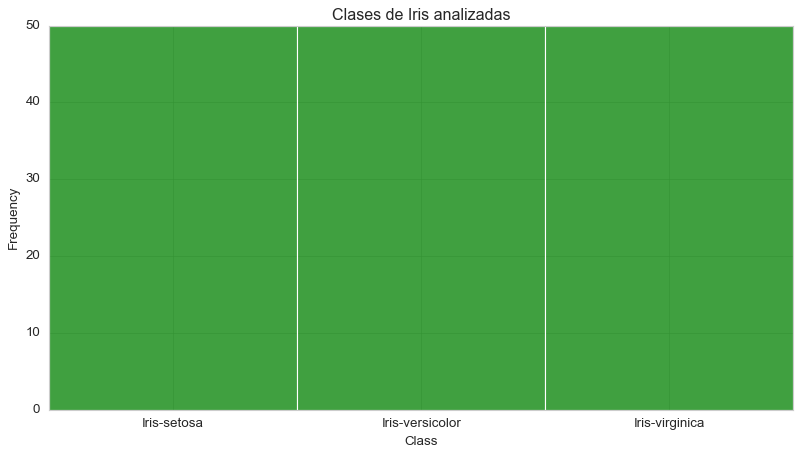

In [50]:

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Histograma de la distribución de la columna 'Age'
sns.histplot(data=iris, x='class',  color='green')

plt.title('Clases de Iris analizadas')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

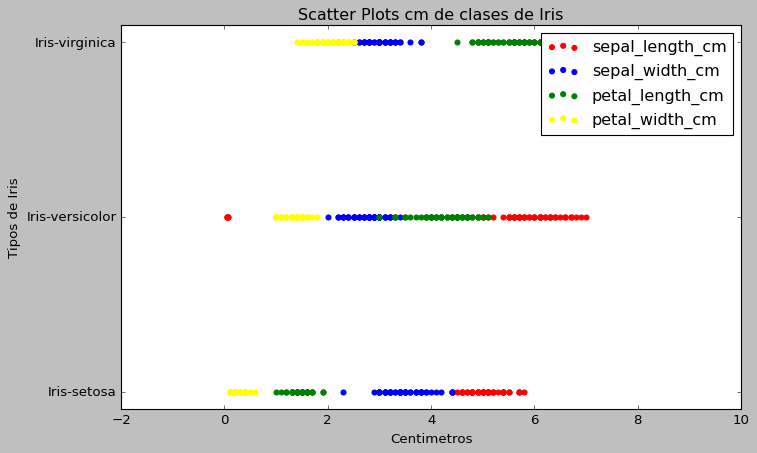

In [43]:
# Crear la figura y los ejes
# No es muy representativa.

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'yellow']

features = [
    ('sepal_length_cm', 'red'),
    ('sepal_width_cm', 'blue'),
    ('petal_length_cm', 'green'),
    ('petal_width_cm', 'yellow')]

# Iterar sobre los datos y graficar cada uno
for idx, (feature, color) in enumerate(features):
    plt.scatter(iris[feature], iris['class'], color=color, label=feature)

plt.title('Scatter Plots cm de clases de Iris')
plt.xlabel('Centimetros')
plt.ylabel('Tipos de Iris')

plt.legend()

plt.show()

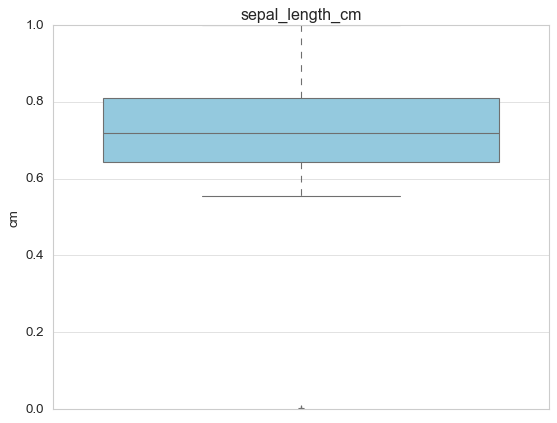

In [53]:
# He usado un boxplot. Te representa todo

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(data=scaled_df, y='sepal_length_cm', color='skyblue')

plt.title('sepal_length_cm')
plt.ylabel('cm')

plt.show()

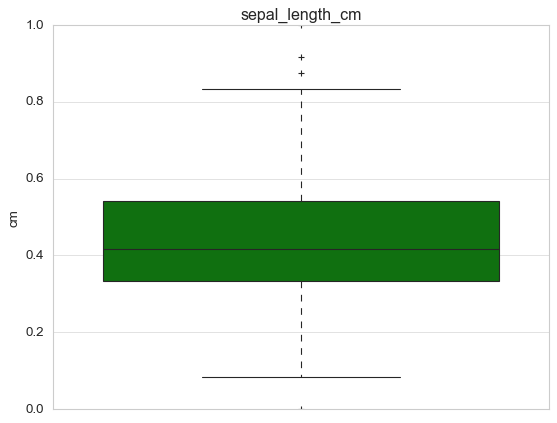

In [56]:
# He usado un boxplot. Te representa todo

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(data=scaled_df, y='sepal_width_cm', color='green')

plt.title('sepal_length_cm')
plt.ylabel('cm')

plt.show()

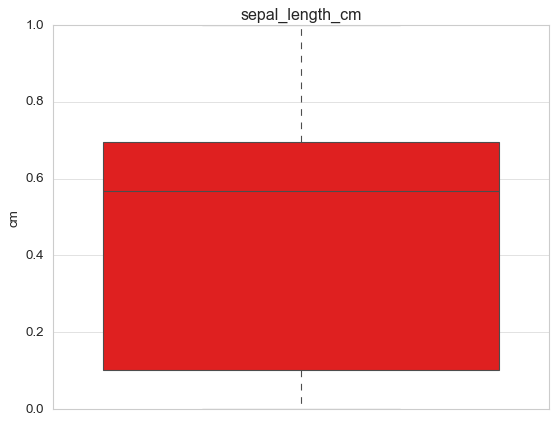

In [57]:
# He usado un boxplot. Te representa todo

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(data=scaled_df, y='petal_length_cm', color='red')

plt.title('sepal_length_cm')
plt.ylabel('cm')

plt.show()

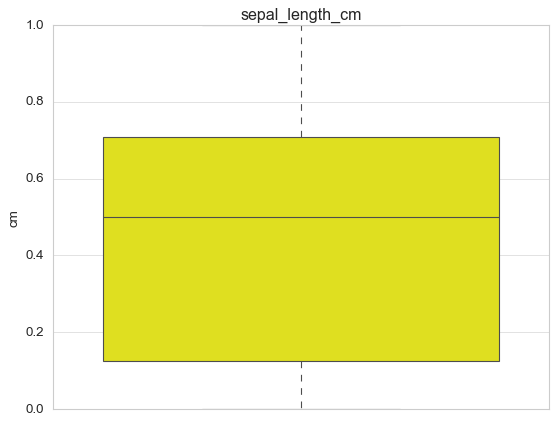

In [58]:
# He usado un boxplot. Te representa todo

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(data=scaled_df, y='petal_width_cm', color='yellow')

plt.title('sepal_length_cm')
plt.ylabel('cm')

plt.show()